### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [3]:
import pandas as pd

df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [4]:
import numpy as np 
import os
import sys
import scipy.io as sio

from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
def svr_func(column):
    target = df["Price"].apply(round)
    # reshape dataframe column
    X = np.array(column).reshape(-1,1)
    target = np.array(target).reshape(-1,1)
    # split data into groups
    X_train, X_test, y_train, y_test = train_test_split(X, target.ravel(), test_size=0.20, random_state=42)
    # SVR
    svr = SVR(kernel="linear", C=100, gamma=.1)
    model = svr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # plot the results
    plt.scatter(X, target, color='red')
    plt.scatter(X_test, y_pred, color='green', alpha=0.3)
    plt.plot(X_test, y_pred, color='green')
    print("Score:", model.score(X_test, y_pred))

In [ ]:
# X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))

Score: 1.0


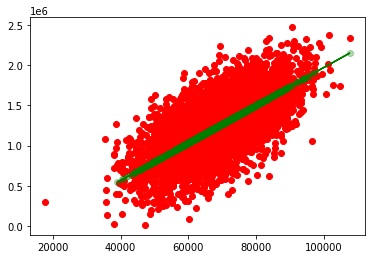

In [24]:
svr_func(df["Avg. Area Income"])

Score: 1.0


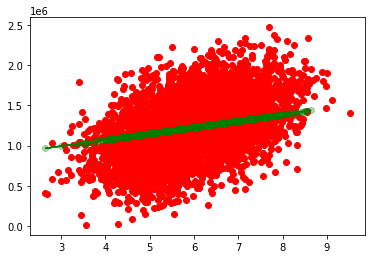

In [25]:
svr_func(df["Avg. Area House Age"])

Score: 1.0


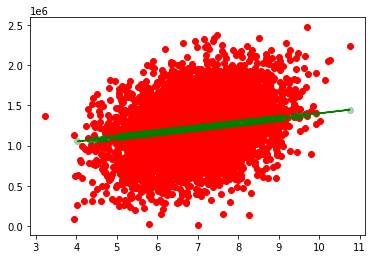

In [26]:
svr_func(df["Avg. Area Number of Rooms"])

Score: 1.0


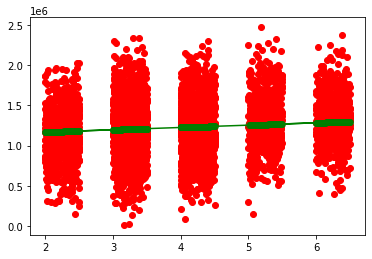

In [27]:
svr_func(df["Avg. Area Number of Bedrooms"])

Score: 1.0


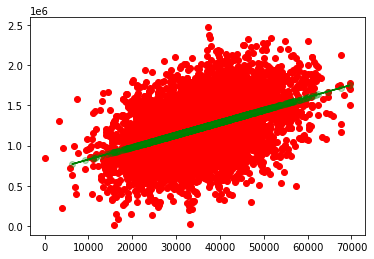

In [28]:
svr_func(df["Area Population"])

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

In [2]:
import numpy as np 
import os
import sys
import scipy.io as sio

from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

In [92]:
target = df["Avg. Area Number of Bedrooms"].apply(round)

In [93]:
# Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

In [94]:
target = np.array(target).reshape(-1,1)

In [69]:
# Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué?

In [99]:
import os 
import sys 
sys.path.append(os.path.dirname(os.getcwd()))
from theory.plot_data import plot_data
from theory.visualize_boundary import visualize_boundary

# reshape dataframe column
target = np.array(target).reshape(-1,1)
# split data into groups
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=42)
#SVC
svc = svm.SVC(C=1000, kernel='rbf', gamma=.1)
svc.fit(X, target)
print ('score:', svc.score(X, target))
plt.figure()
visualize_boundary(X, target, svc)
plt.show()

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
score: 0.9924


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
svc_func(df["Avg. Area Income"], target)

In [51]:
X = df.drop(["Avg. Area Number of Bedrooms", "Address"], axis=1)

In [52]:
sys.path.append(os.path.dirname(os.getcwd()))
from theory.plot_data import plot_data
from theory.visualize_boundary import visualize_boundary

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=42)


In [55]:
# SVM 
clf = svm.SVC(C=1000, kernel='rbf', gamma=10)
clf.fit(X_train, y_train)

plt.figure()
visualize_boundary(X, target, clf)

plt.show()

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


TypeError: '((array([], dtype=int64), array([], dtype=int64)), 0)' is an invalid key

In [ ]:
# ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target?